In [1]:
install.packages('fpp3', dependencies = TRUE)
library(fpp3)
install.packages("tidyverse")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.2      ✔ tsibble     1.0.1 
✔ dplyr       1.0.6      ✔ tsibbledata 0.3.0 
✔ tidyr       1.1.3      ✔ feasts      0.2.1 
✔ lubridate   1.7.10     ✔ fable       0.3.1 
✔ ggplot2     3.3.3      

── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridate::interval()
✖ dplyr::lag()         masks stats::lag()
✖ tsibble::setdiff()   masks base::setdiff()
✖ tsibble::union()     masks base::union()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# 1 Hierarchical and grouped time series

## Example: Australian tourism hierarchy

In [2]:
tourism

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,South Australia,Business,135.07769
1998 Q2,Adelaide,South Australia,Business,109.98732
1998 Q3,Adelaide,South Australia,Business,166.03469
1998 Q4,Adelaide,South Australia,Business,127.16046
1999 Q1,Adelaide,South Australia,Business,137.44853
1999 Q2,Adelaide,South Australia,Business,199.91259
1999 Q3,Adelaide,South Australia,Business,169.35509
1999 Q4,Adelaide,South Australia,Business,134.35794
2000 Q1,Adelaide,South Australia,Business,154.03440


In [3]:
tourism <- tsibble::tourism 

tourism

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,South Australia,Business,135.07769
1998 Q2,Adelaide,South Australia,Business,109.98732
1998 Q3,Adelaide,South Australia,Business,166.03469
1998 Q4,Adelaide,South Australia,Business,127.16046
1999 Q1,Adelaide,South Australia,Business,137.44853
1999 Q2,Adelaide,South Australia,Business,199.91259
1999 Q3,Adelaide,South Australia,Business,169.35509
1999 Q4,Adelaide,South Australia,Business,134.35794
2000 Q1,Adelaide,South Australia,Business,154.03440


In [4]:
tourism <- tsibble::tourism %>%
 mutate(
       State=recode(State,
    `New South Wales` = "NSW",
    `Northern Territory` = "NT",
    `Queensland` = "QLD",
    `South Australia` = "SA",
    `Tasmania` = "TAS",
    `Victoria` = "VIC",
    `Western Australia` = "WA"
                   )
       )

In [5]:
tourism

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,SA,Business,135.07769
1998 Q2,Adelaide,SA,Business,109.98732
1998 Q3,Adelaide,SA,Business,166.03469
1998 Q4,Adelaide,SA,Business,127.16046
1999 Q1,Adelaide,SA,Business,137.44853
1999 Q2,Adelaide,SA,Business,199.91259
1999 Q3,Adelaide,SA,Business,169.35509
1999 Q4,Adelaide,SA,Business,134.35794
2000 Q1,Adelaide,SA,Business,154.03440


- Using the aggregate_key() function, we can create the hierarchical time series with overnight trips in regions at the bottom level of the hierarchy, aggregated to states, which are aggregated to the national total. 
- A hierarchical time series corresponding to the nested structure is created using a parent/child specification.

In [6]:
tourism_hts <- tourism %>%
 aggregate_key(State / Region, Trips =sum(Trips))

tourism_hts

Quarter,State,Region,Trips
<qtr>,<chr*>,<chr*>,<dbl>
1998 Q1,<aggregated>,<aggregated>,23182.20
1998 Q2,<aggregated>,<aggregated>,20323.38
1998 Q3,<aggregated>,<aggregated>,19826.64
1998 Q4,<aggregated>,<aggregated>,20830.13
1999 Q1,<aggregated>,<aggregated>,22087.35
1999 Q2,<aggregated>,<aggregated>,21458.37
1999 Q3,<aggregated>,<aggregated>,19914.19
1999 Q4,<aggregated>,<aggregated>,20027.93
2000 Q1,<aggregated>,<aggregated>,22339.29


- The new tsibble now has some additional rows corresponding to state and national aggregations for each quarter

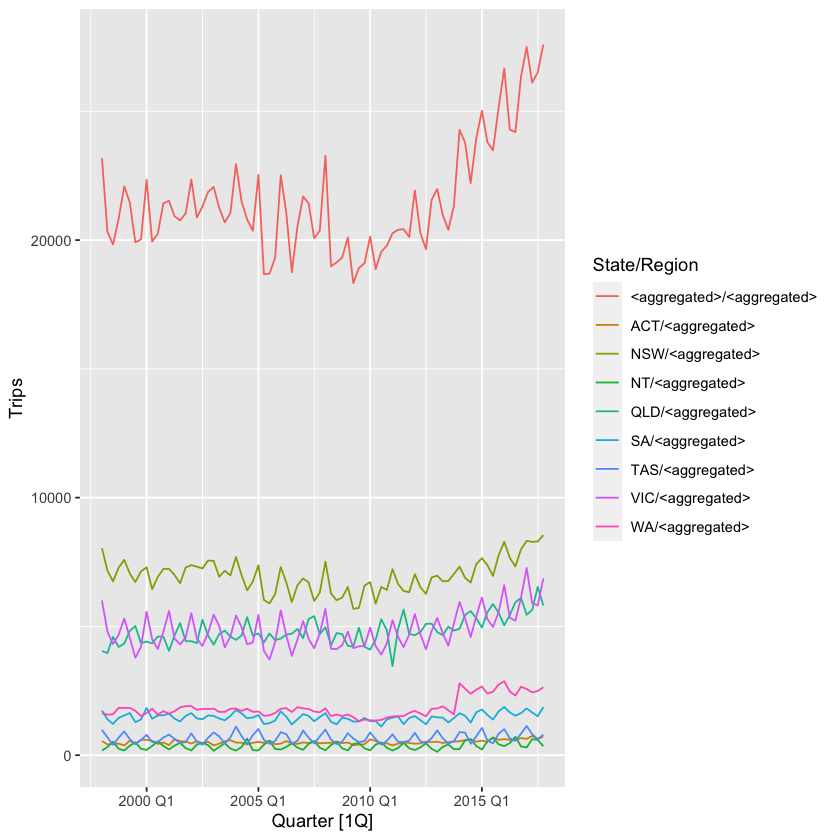

In [7]:
tourism_hts %>%
 filter(is_aggregated(Region)) %>%
 autoplot(Trips)

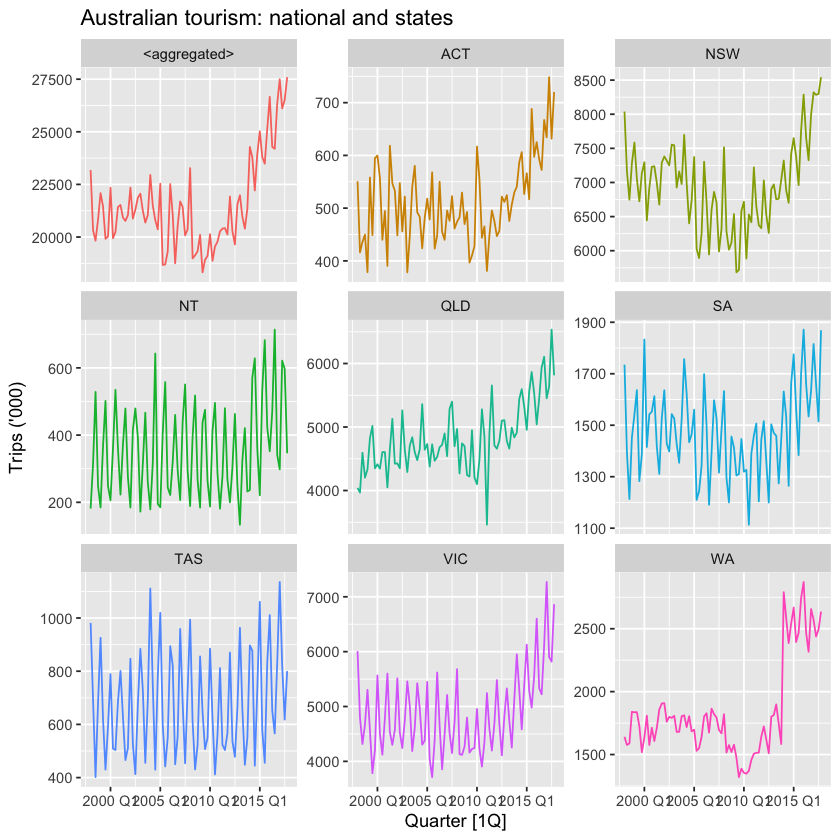

In [8]:
tourism_hts %>%
  filter(is_aggregated(Region)) %>%
  autoplot(Trips) +
  labs(y = "Trips ('000)",
       title = "Australian tourism: national and states") +
  facet_wrap(vars(State), scales = "free_y", ncol = 3) +
  theme(legend.position = "none")


- The aggregate total overnight trips for the whole of Australia as well as the states, revealing diverse and rich dynamics.
- For example, there is noticeable national growth since 2010 and for some states such as the ACT, New South Wales, Queensland, South Australia, and Victoria.
- There seems to be a significant jump for Western Australia in 2014.

# Grouped time series


In [30]:
library(readr)

### Example: Australian prison population

Data: total number of prisoners in Australia over the period 2005Q1–2016Q4

In [36]:
prison <- read_csv("https://OTexts.com/fpp3/extrafiles/
                                   prison_population.csv")

In [37]:
prison <- readr::read_csv("https://OTexts.com/fpp3/extrafiles/
                                   prison_population.csv") 

In [38]:
prison

https://OTexts.com/fpp3/extrafiles/
<chr>
prison_population.csv


In [76]:
prison <- readr::read_csv("https://OTexts.com/fpp3/extrafiles/prison_population.csv")
mutate(prison, Quarter = yearquarter(Date))%>%
select(-Date) %>%
as_tsibble(key = c(Gender, Legal, State, Indigenous),index = Quarter) %>%
relocate(Quarter)


── Column specification ────────────────────────────────────────────────────────
cols(
  Date = col_date(format = ""),
  State = col_character(),
  Gender = col_character(),
  Legal = col_character(),
  Indigenous = col_character(),
  Count = col_double()
)




Quarter,State,Gender,Legal,Indigenous,Count
<qtr>,<chr>,<chr>,<chr>,<chr>,<dbl>
2005 Q1,ACT,Female,Remanded,ATSI,0
2005 Q2,ACT,Female,Remanded,ATSI,1
2005 Q3,ACT,Female,Remanded,ATSI,0
2005 Q4,ACT,Female,Remanded,ATSI,0
2006 Q1,ACT,Female,Remanded,ATSI,1
2006 Q2,ACT,Female,Remanded,ATSI,1
2006 Q3,ACT,Female,Remanded,ATSI,1
2006 Q4,ACT,Female,Remanded,ATSI,0
2007 Q1,ACT,Female,Remanded,ATSI,0


In [77]:
prison_gts <- prison %>%
  aggregate_key(Gender * Legal * State, Count = sum(Count)/1e3)

ERROR: Error in UseMethod("aggregate_key"): no applicable method for 'aggregate_key' applied to an object of class "c('spec_tbl_df', 'tbl_df', 'tbl', 'data.frame')"


In [78]:
prison_gts <- prison %>%
  aggregate_key(Gender * Legal * State, Count = sum(Count)/1e3)

ERROR: Error in UseMethod("aggregate_key"): no applicable method for 'aggregate_key' applied to an object of class "c('spec_tbl_df', 'tbl_df', 'tbl', 'data.frame')"


In [23]:
prison <- readr::read_csv("https://OTexts.com/fpp3/extrafiles/
                                   prison_population.csv") %>%
  mutate(Quarter = yearquarter(Date)) %>%
  select(-Date)  %>%
  as_tsibble(key = c(Gender, Legal, State, Indigenous),
             index = Quarter) %>%
  relocate(Quarter)

ERROR: Error: Problem with `mutate()` column `Quarter`.
[34mℹ[39m `Quarter = yearquarter(Date)`.
[31m✖[39m `yearquarter()` doesn't know how to handle the function class yet.


# Mixed hierarchical and grouped structure

In [41]:
tourism

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,SA,Business,135.07769
1998 Q2,Adelaide,SA,Business,109.98732
1998 Q3,Adelaide,SA,Business,166.03469
1998 Q4,Adelaide,SA,Business,127.16046
1999 Q1,Adelaide,SA,Business,137.44853
1999 Q2,Adelaide,SA,Business,199.91259
1999 Q3,Adelaide,SA,Business,169.35509
1999 Q4,Adelaide,SA,Business,134.35794
2000 Q1,Adelaide,SA,Business,154.03440


In [40]:
tourism_full <- tourism %>%
  aggregate_key((State/Region) * Purpose, Trips = sum(Trips))

tourism_full

Quarter,State,Purpose,Region,Trips
<qtr>,<chr*>,<chr*>,<chr*>,<dbl>
1998 Q1,<aggregated>,<aggregated>,<aggregated>,23182.20
1998 Q2,<aggregated>,<aggregated>,<aggregated>,20323.38
1998 Q3,<aggregated>,<aggregated>,<aggregated>,19826.64
1998 Q4,<aggregated>,<aggregated>,<aggregated>,20830.13
1999 Q1,<aggregated>,<aggregated>,<aggregated>,22087.35
1999 Q2,<aggregated>,<aggregated>,<aggregated>,21458.37
1999 Q3,<aggregated>,<aggregated>,<aggregated>,19914.19
1999 Q4,<aggregated>,<aggregated>,<aggregated>,20027.93
2000 Q1,<aggregated>,<aggregated>,<aggregated>,22339.29


# 2 Single level approaches

- Traditionally, forecasts of hierarchical or grouped time series involved selecting one level of aggregation and generating forecasts for that level.
- These are then either aggregated for higher levels, or disaggregated for lower levels, to obtain a set of coherent forecasts for the rest of the structure.

## The bottom-up approach

- First generating forecasts for each series at the bottom level, 
- Second, summing these to produce forecasts for all the series in the structure.

## Example: Generating bottom-up forecasts
- we want national and state forecasts for the Australian tourism data
- but we aren’t interested in disaggregations using regions or the purpose of travel.

In [44]:
tourism

Quarter,Region,State,Purpose,Trips
<qtr>,<chr>,<chr>,<chr>,<dbl>
1998 Q1,Adelaide,SA,Business,135.07769
1998 Q2,Adelaide,SA,Business,109.98732
1998 Q3,Adelaide,SA,Business,166.03469
1998 Q4,Adelaide,SA,Business,127.16046
1999 Q1,Adelaide,SA,Business,137.44853
1999 Q2,Adelaide,SA,Business,199.91259
1999 Q3,Adelaide,SA,Business,169.35509
1999 Q4,Adelaide,SA,Business,134.35794
2000 Q1,Adelaide,SA,Business,154.03440


first create a simple tsibble object containing only state and national trip totals for each quarter.

In [43]:
tourism_states <- tourism %>%
  aggregate_key(State, Trips = sum(Trips))

tourism_states

Quarter,State,Trips
<qtr>,<chr*>,<dbl>
1998 Q1,<aggregated>,23182.20
1998 Q2,<aggregated>,20323.38
1998 Q3,<aggregated>,19826.64
1998 Q4,<aggregated>,20830.13
1999 Q1,<aggregated>,22087.35
1999 Q2,<aggregated>,21458.37
1999 Q3,<aggregated>,19914.19
1999 Q4,<aggregated>,20027.93
2000 Q1,<aggregated>,22339.29


In [46]:
fcasts_state <- tourism_states %>%
  filter(!is_aggregated(State)) 

fcasts_state

Quarter,State,Trips
<qtr>,<chr*>,<dbl>
1998 Q1,ACT,551.0019
1998 Q1,NSW,8039.7948
1998 Q1,NT,181.4488
1998 Q1,QLD,4041.3702
1998 Q1,SA,1735.4384
1998 Q1,TAS,981.6292
1998 Q1,VIC,6010.4245
1998 Q1,WA,1641.0895
1998 Q2,ACT,416.0256


- First, We could generate the bottom-level state forecasts,
- Second, sum them to obtain the national forecast

In [47]:
fcasts_state <- tourism_states %>%
  filter(!is_aggregated(State)) %>%
  model(ets = ETS(Trips)) %>%
  forecast()

In [48]:
fcasts_state

State,.model,Quarter,Trips,.mean
<chr*>,<chr>,<qtr>,<dist>,<dbl>
ACT,ets,2018 Q1,"N(701, 7651)",700.6943
ACT,ets,2018 Q2,"N(717, 8032)",717.2949
ACT,ets,2018 Q3,"N(734, 8440)",733.8954
ACT,ets,2018 Q4,"N(750, 8882)",750.4960
ACT,ets,2019 Q1,"N(767, 9368)",767.0965
ACT,ets,2019 Q2,"N(784, 9905)",783.6970
ACT,ets,2019 Q3,"N(800, 10503)",800.2976
ACT,ets,2019 Q4,"N(817, 11171)",816.8981
NSW,ets,2018 Q1,"N(8886, 96984)",8885.5451


In [50]:
# Sum bottom-level forecasts to get top-level forecasts
fcasts_national <- fcasts_state %>%
  summarise(value = sum(Trips), .mean = mean(value))

fcasts_national

Quarter,value,.mean
<qtr>,<dist>,<dbl>
2018 Q1,"N(28925, 480068)",28924.60
2018 Q2,"N(26929, 509928)",26928.97
2018 Q3,"N(26267, 564670)",26266.73
2018 Q4,"N(27166, 7e+05)",27165.55
2019 Q1,"N(28991, 935854)",28991.01
2019 Q2,"N(26995, 894181)",26995.38
2019 Q3,"N(26333, 920929)",26333.13
2019 Q4,"N(27232, 1092272)",27231.95


- we want a more general approach that will work with all the forecasting methods discussed in his book.
- So he will use the reconcile() function to specify how we want to compute coherent forecasts.

In [51]:
tourism_states %>%
  model(ets = ETS(Trips)) %>%
  reconcile(bu = bottom_up(ets)) %>%
  forecast()

State,.model,Quarter,Trips,.mean
<chr*>,<chr>,<qtr>,<dist>,<dbl>
ACT,ets,2018 Q1,"N(701, 7651)",700.6943
ACT,ets,2018 Q2,"N(717, 8032)",717.2949
ACT,ets,2018 Q3,"N(734, 8440)",733.8954
ACT,ets,2018 Q4,"N(750, 8882)",750.4960
ACT,ets,2019 Q1,"N(767, 9368)",767.0965
ACT,ets,2019 Q2,"N(784, 9905)",783.6970
ACT,ets,2019 Q3,"N(800, 10503)",800.2976
ACT,ets,2019 Q4,"N(817, 11171)",816.8981
ACT,bu,2018 Q1,"N(701, 7651)",700.6943


- The reconcile() step has created a new “model” to produce bottom-up forecasts. 
- The fable object contains the ets forecasts as well as the coherent bu forecasts, for the 8 states and the national aggregate. 

#### Workflow for forecasting aggregation structures

-the general workflow for hierarchical and grouped forecasts. We use the following pipeline of functions.
- data %>% aggregate_key() %>% model() %>%
  reconcile() %>% forecast()
  
 - 1) Begin with a tsibble object (here labelled data) containing the individual bottom-level series.
 - 2) Define in aggregate_key() the aggregation structure and build a tsibble object that also contains the aggregate series.
 - 3) Identify a model() for each series, at all levels of aggregation.
 - 4) Specify in reconcile() how the coherent forecasts are to be generated from the selected    models.
 - 5) Use the forecast() function to generate forecasts for the whole aggregation structure.  

ERROR: Error in filter(., year(Quarter) <= 2014): object 'prison_gts' not found


# 3) 4 Forecasting Australian domestic tourism

In [57]:

tourism_full <- tourism %>%
  aggregate_key((State/Region) * Purpose, Trips = sum(Trips))

tourism_full

Quarter,State,Purpose,Region,Trips
<qtr>,<chr*>,<chr*>,<chr*>,<dbl>
1998 Q1,<aggregated>,<aggregated>,<aggregated>,23182.20
1998 Q2,<aggregated>,<aggregated>,<aggregated>,20323.38
1998 Q3,<aggregated>,<aggregated>,<aggregated>,19826.64
1998 Q4,<aggregated>,<aggregated>,<aggregated>,20830.13
1999 Q1,<aggregated>,<aggregated>,<aggregated>,22087.35
1999 Q2,<aggregated>,<aggregated>,<aggregated>,21458.37
1999 Q3,<aggregated>,<aggregated>,<aggregated>,19914.19
1999 Q4,<aggregated>,<aggregated>,<aggregated>,20027.93
2000 Q1,<aggregated>,<aggregated>,<aggregated>,22339.29


In [58]:
fit <- tourism_full %>%
  filter(year(Quarter) <= 2015) %>%
  model(base = ETS(Trips)) %>%
  reconcile(
    bu = bottom_up(base),
    ols = min_trace(base, method = "ols"),
    mint = min_trace(base, method = "mint_shrink"),
  )

In [59]:
fit

State,Purpose,Region,base,bu,ols,mint
<chr*>,<chr*>,<chr*>,<model>,<model>,<model>,<model>
ACT,Business,Canberra,"<ETS(M,N,A)>","<ETS(M,N,A)>","<ETS(M,N,A)>","<ETS(M,N,A)>"
ACT,Business,<aggregated>,"<ETS(M,N,A)>","<ETS(M,N,A)>","<ETS(M,N,A)>","<ETS(M,N,A)>"
ACT,Holiday,Canberra,"<ETS(M,N,A)>","<ETS(M,N,A)>","<ETS(M,N,A)>","<ETS(M,N,A)>"
ACT,Holiday,<aggregated>,"<ETS(M,N,A)>","<ETS(M,N,A)>","<ETS(M,N,A)>","<ETS(M,N,A)>"
ACT,Other,Canberra,"<ETS(M,N,N)>","<ETS(M,N,N)>","<ETS(M,N,N)>","<ETS(M,N,N)>"
ACT,Other,<aggregated>,"<ETS(M,N,N)>","<ETS(M,N,N)>","<ETS(M,N,N)>","<ETS(M,N,N)>"
ACT,Visiting,Canberra,"<ETS(A,N,N)>","<ETS(A,N,N)>","<ETS(A,N,N)>","<ETS(A,N,N)>"
ACT,Visiting,<aggregated>,"<ETS(A,N,N)>","<ETS(A,N,N)>","<ETS(A,N,N)>","<ETS(A,N,N)>"
ACT,<aggregated>,Canberra,"<ETS(A,N,N)>","<ETS(A,N,N)>","<ETS(A,N,N)>","<ETS(A,N,N)>"


In [60]:
fc <- fit %>%
     forecast(h = "2 years")

Passing fit into forecast() generates base and coherent forecasts across all the series in the aggregation structure

In [62]:
fc

State,Purpose,Region,.model,Quarter,Trips,.mean
<chr*>,<chr*>,<chr*>,<chr>,<qtr>,<dist>,<dbl>
ACT,Business,Canberra,base,2016 Q1,"N(112, 669)",112.0167
ACT,Business,Canberra,base,2016 Q2,"N(158, 1338)",158.3450
ACT,Business,Canberra,base,2016 Q3,"N(157, 1315)",157.0130
ACT,Business,Canberra,base,2016 Q4,"N(152, 1226)",151.5897
ACT,Business,Canberra,base,2017 Q1,"N(112, 669)",112.0167
ACT,Business,Canberra,base,2017 Q2,"N(158, 1338)",158.3450
ACT,Business,Canberra,base,2017 Q3,"N(157, 1315)",157.0130
ACT,Business,Canberra,base,2017 Q4,"N(152, 1226)",151.5897
ACT,Business,Canberra,bu,2016 Q1,"N(112, 669)",112.0167


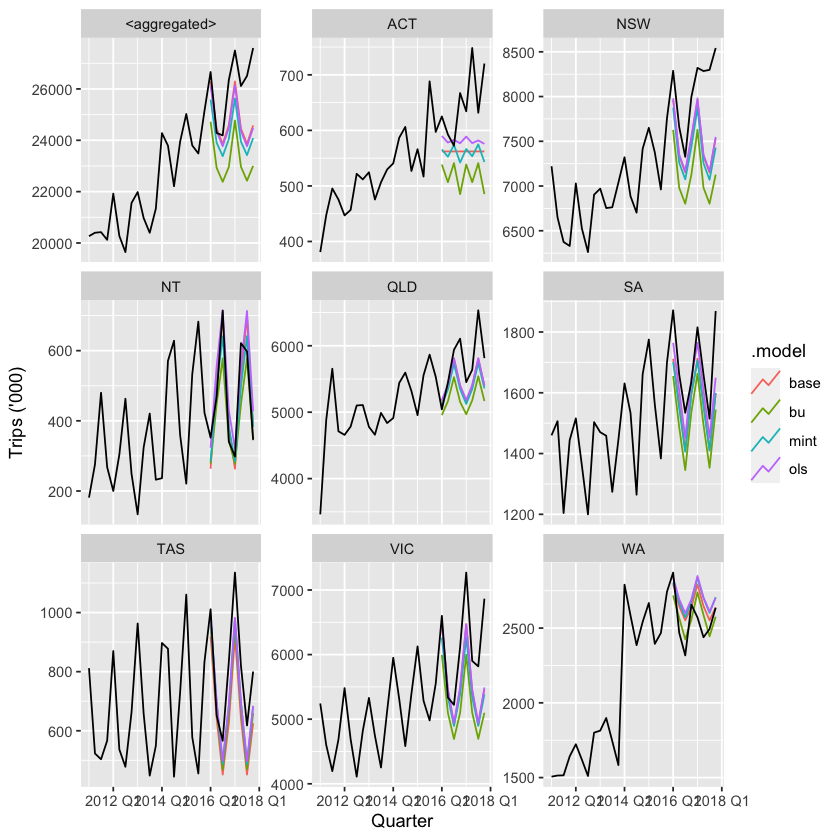

In [68]:
fc %>%
  filter(is_aggregated(Region), is_aggregated(Purpose)) %>%
  autoplot(
    tourism_full %>% filter(year(Quarter) >= 2011),
    level = NULL) +  #If i erase level=NULL, then I dont considerer the confidence interval
  labs(y = "Trips ('000)") +
  facet_wrap(vars(State), scales = "free_y")

- the four point forecasts for the overnight trips for the Australian total, the states, along with the actual observations of the test set.

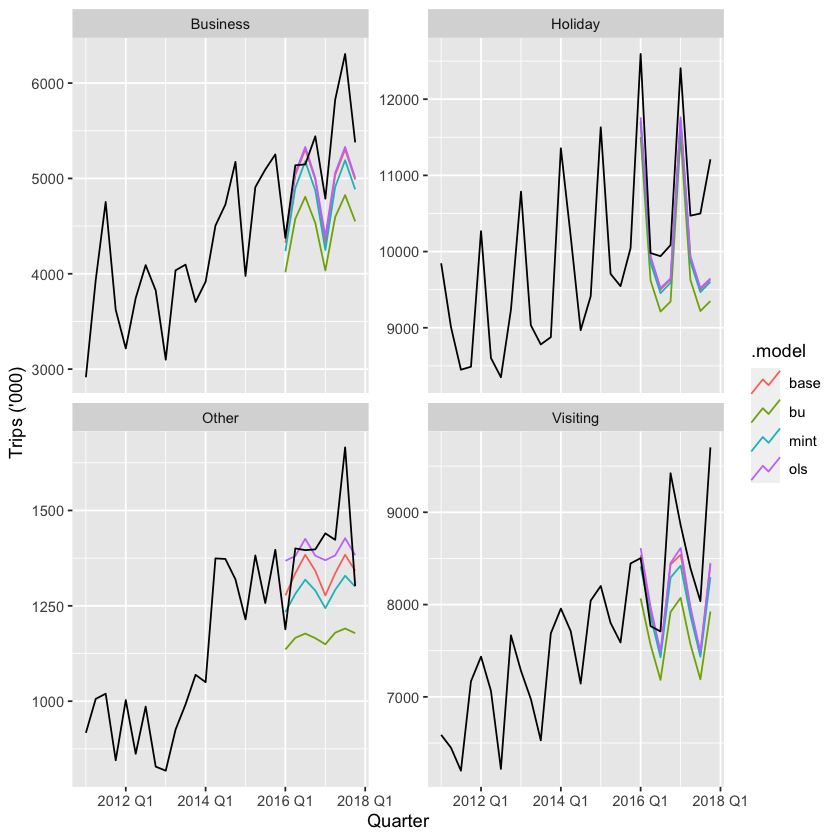

In [66]:
fc %>%
  filter(is_aggregated(State), !is_aggregated(Purpose)) %>%
  autoplot(
    tourism_full %>% filter(year(Quarter) >= 2011),
    level = NULL
  ) +
  labs(y = "Trips ('000)") +
  facet_wrap(vars(Purpose), scales = "free_y")

- plot the four point forecasts for the overnight trips for the purposes of travel, along with the actual observations of the test set.

In [70]:
fc %>%
  filter(is_aggregated(State), is_aggregated(Purpose)) %>%
  accuracy(
    data = tourism_full,
    measures = list(rmse = RMSE, mase = MASE)
  )

.model,State,Purpose,Region,.type,rmse,mase
<chr>,<chr*>,<chr*>,<chr*>,<chr>,<dbl>,<dbl>
base,<aggregated>,<aggregated>,<aggregated>,Test,1720.724,1.532867
bu,<aggregated>,<aggregated>,<aggregated>,Test,3069.862,3.164072
mint,<aggregated>,<aggregated>,<aggregated>,Test,2157.588,2.086117
ols,<aggregated>,<aggregated>,<aggregated>,Test,1803.513,1.627071


In [69]:
fc %>%
  filter(is_aggregated(State), is_aggregated(Purpose)) %>%
  accuracy(
    data = tourism_full,
    measures = list(rmse = RMSE, mase = MASE)
  ) %>%
  group_by(.model) %>%
  summarise(rmse = mean(rmse), mase = mean(mase))

.model,rmse,mase
<chr>,<dbl>,<dbl>
base,1720.724,1.532867
bu,3069.862,3.164072
mint,2157.588,2.086117
ols,1803.513,1.627071


- Reconciling the base forecasts using OLS and MinT results in more accurate forecasts compared to the bottom-up approach. 
- This result is commonly observed in applications as reconciliation approaches use information from all levels of the structure, resulting in more accurate coherent forecasts compared to the older traditional methods which use limited information. 
- Furthermore, reconciliation usually improves the incoherent base forecasts for almost all levels.